In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np  
bs = 64

In [17]:
path = Path('/notebooks/storage/data/dogs_cats_simple')
path_train = path/'train'
path_test = path/'test'

In [60]:
fnames = get_image_files(path_train)
fnames_test = get_image_files(path_test)
fnames[:5]

[PosixPath('/notebooks/storage/data/dogs_cats_simple/train/dog.10711.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/train/dog.5445.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/train/cat.7208.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/train/dog.8591.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/train/dog.8850.jpg')]

In [20]:
np.random.seed(2)
pat = r'/([^/]+)\.\d+.jpg$'

In [21]:
doc( ImageDataBunch.from_name_re)

In [22]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs, test=path_test
                                  ).normalize(imagenet_stats)

In [23]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [67]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.038148,0.028654,0.008200,02:22
1,0.032483,0.027559,0.008000,02:22
2,0.029059,0.019536,0.005400,02:22
3,0.021047,0.018960,0.006000,02:22


In [30]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,dog,dog,dog,cat
Path: /notebooks/storage/data/dogs_cats_simple;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,dog,cat,dog,dog
Path: /notebooks/storage/data/dogs_cats_simple;

Test: LabelList (12500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /notebooks/storage/data/dogs_cats_simple, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dila

In [63]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


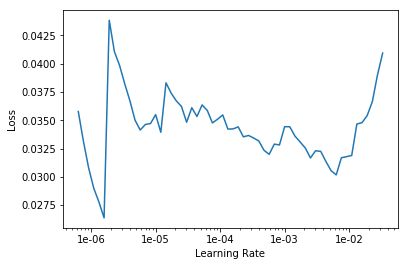

In [64]:
learn.recorder.plot()

In [25]:
interp = ClassificationInterpretation.from_learner(learn)


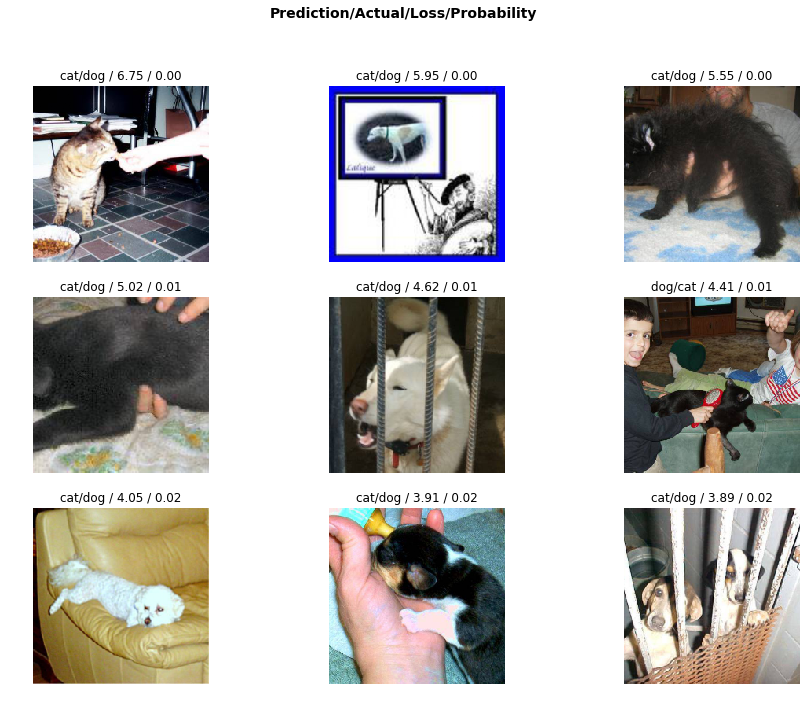

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

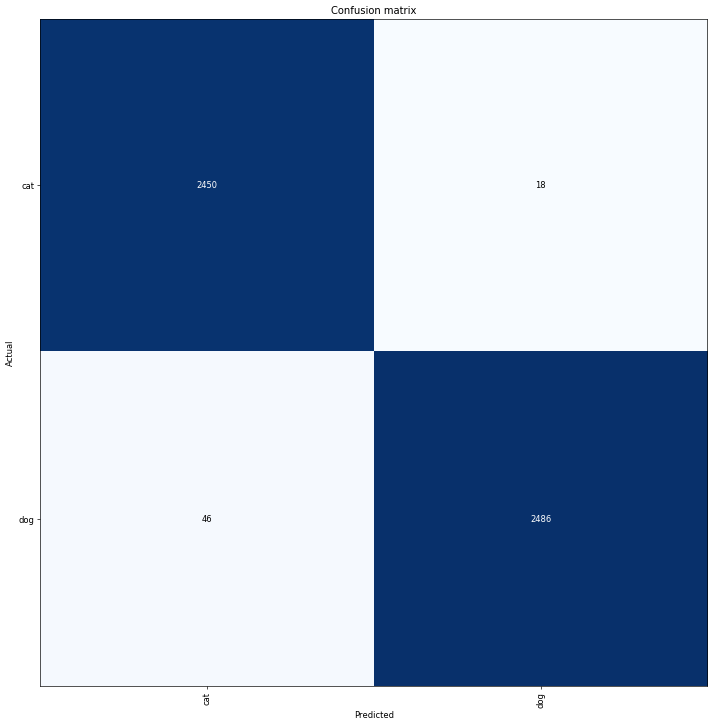

In [28]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [33]:
preds, y, losses = learn.get_preds(ds_type=DatasetType.Test, with_loss=True)

In [69]:
fnames_test

[PosixPath('/notebooks/storage/data/dogs_cats_simple/test/7808.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/225.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/4117.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/1228.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/1035.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/11434.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/5625.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/4887.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/6978.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/1987.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/1206.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/4639.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/8243.jpg'),
 PosixPath('/notebooks/storage/data/dogs_cats_simple/test/778.jpg'),
 PosixPath('/notebook

In [59]:
classification = preds[:,1]

torch.Size([12500])


In [81]:
ids = np.array([int(f.stem) for f in fnames_test])

[ 7808   225  4117  1228 ...  9192  9072  2257 12037]


In [82]:
subm = np.stack([ids,classification], axis=1)

[[7.808000e+03 2.185427e-05]
 [2.250000e+02 9.999938e-01]
 [4.117000e+03 7.551217e-09]
 [1.228000e+03 2.241632e-04]
 ...
 [9.192000e+03 2.724277e-03]
 [9.072000e+03 9.999998e-01]
 [2.257000e+03 7.100952e-04]
 [1.203700e+04 9.960770e-01]]


In [83]:
np.savetxt('submission.csv', subm, fmt='%d,%.5f', header='id,label', comments='')